Nenwin-project (NEural Networks WIthout Neurons) for
the AI Honors Academy track 2020-2021 at the TU Eindhoven.

Authors: Lulof Pirée

May 2021

Copyright (C) 2021 Lulof Pirée

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# Testset evaluation
This notebook evaluates the best obtained model on the testset.
The hyperparameter values used (input-placer, step size, maximum number of steps, etc.)
are the same as during training.

In [1]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt

from nenwin.constants import BANKNOTE_CHECKPOINT_DIR
from nenwin.model import NenwinModel
from nenwin.backprop.filename_gen import FilenameGenerator
from nenwin.backprop.trainer import NenwinTrainer
from nenwin.backprop.training_stats import TrainingStats
from nenwin.banknote_dataset.load_dataset import load_banknote_dataset, BanknoteDataset
from nenwin.plot_model import plot_model
from nenwin.banknote_dataset.architectures import ARCHITECTURES, gen_architecture
from nenwin.banknote_dataset.create_trainer import create_trainer
from nenwin.grid_input_placer import MassGridInputPlacer, VelInputPlacer, ConstVelMassInputPlacer
from nenwin.all_particles import Marble, MarbleEaterNode, Node

In [2]:
ARCH = ARCHITECTURES.C
INPUTPLACER_FACTORY = (
    lambda input_pos, input_region_sizes :      
    ConstVelMassInputPlacer(input_pos, input_region_sizes,
                            torch.tensor([0.5, 0]))
)
_, INPUT_PLACER, _ = gen_architecture(ARCH, INPUTPLACER_FACTORY)

/home/nifrec/Vault/Documents/bachelor_3/honors/nenwin/nenwin/grid_input_placer.py:183: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.marble_vel = torch.tensor(marble_vel, dtype=torch.float)


In [3]:
filename = "/home/nifrec/Vault/Documents/bachelor_3/honors/nenwin/nenwin/" \
    +"banknote_dataset/checkpoints/" \
    + "BANKNOTE_C_Thu_May_20_22-25-11_2021_checkpoint.txt"
import torch.tensor as tensor
from nenwin.attraction_functions.attraction_functions import ThresholdGravity, NewtonianGravity
with open(filename, "r") as file:
    MODEL = eval(file.readline())

EATERS = MODEL.marble_eater_nodes

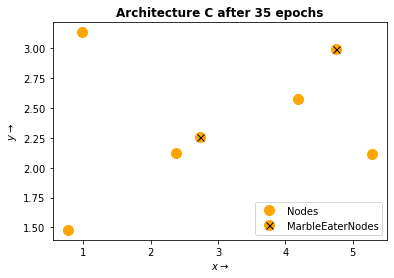

In [4]:
fig, ax = plot_model(MODEL)
ax.set_title(f"Architecture C after 35 epochs", weight="bold");

In [5]:
LOSS_POS_WEIGHT = 1
LOSS_VEL_WEIGHT = 1
DATASET = load_banknote_dataset()
BATCH_SIZE = 2
TRAINER, _ = create_trainer(MODEL, 
                         INPUT_PLACER, 
                         EATERS,
                         DATASET,
                         loss_pos_weight= LOSS_POS_WEIGHT,
                         loss_vel_weight = LOSS_VEL_WEIGHT,
                         architecture = ARCH)

In [6]:
step_size = 0.1
num_steps_till_read_output = int(2 / step_size)
TRAINER.evaluate_model(step_size, num_steps_till_read_output, use_validation=False)

(0.21739130434782608, -24058.342236720026)